In [1]:
from array import array
import math
import numpy as np

In [2]:
fs = 0.2
phis = 0.0
N = 50
tseries = 50.0

In [3]:
tau = tseries/N
t = array('d')
y = array('d')
f = array('d')
ytReal = array('d')
ytImag = array('d')

In [4]:
for i in range(N):
    t.append(i*tau)
    y.append(math.sin(2.0*math.pi*t[i]*fs) + phis)
    f.append(i/(N*tau))

In [5]:
twopiN=-2.0*math.pi/N
for k in range(N):
    ytReal.append(0.0)
    ytImag.append(0.0)
    for j in range(N):
        ytReal[k] = ytReal[k] + y[j]*math.cos(twopiN*j*k)
        ytImag[k] = ytImag[k] + y[j]*math.sin(twopiN*j*k)       

In [6]:
for i in range(N):
    print(t[i],y[i],f[i],ytReal[i],ytImag[i])

0.0 0.0 0.0 6.050715484207103e-15 0.0
0.1 0.12533323356430426 0.02 1.9984014443252818e-15 -3.121504790759566e-14
0.2 0.2486898871648548 0.04 1.607047828144914e-14 2.395392911802574e-14
0.30000000000000004 0.36812455268467803 0.06 -7.588374373312945e-14 -3.2715150033446605e-14
0.4 0.4817536741017153 0.08 4.1300296516055823e-14 -5.60515175940246e-14
0.5 0.5877852522924731 0.1 5.3040905001466854e-14 1.3844828061770897e-14
0.6000000000000001 0.6845471059286887 0.12 -3.3861802251067274e-14 -1.952604744559494e-14
0.7000000000000001 0.7705132427757891 0.14 -4.603262215852055e-14 -1.4066872666695929e-14
0.8 0.8443279255020151 0.16 -6.128431095930864e-14 -5.3420809442705774e-14
0.9 0.9048270524660196 0.18 -1.8415824420969784e-14 -1.8982732052919005e-13
1.0 0.9510565162951535 0.2 3.993472219576688e-13 -250.00000000000026
1.1 0.9822872507286887 0.22 -8.743006318923108e-16 9.542019951958025e-14
1.2000000000000002 0.9980267284282716 0.24 -2.6076363290883364e-14 8.477246682403461e-14
1.3 0.998026728

49.2 -0.8443279255020095 9.84 -6.8833827526759706e-15 8.255514327704105e-13
49.300000000000004 -0.7705132427757877 9.86 -4.0448200344656016e-13 1.3196683329441683e-12
49.400000000000006 -0.6845471059286822 9.88 7.657902090230095e-13 2.539078322594257e-12
49.5 -0.5877852522924665 9.9 2.0836110614652625e-13 1.2045937164417708e-12
49.6 -0.48175367410171493 9.92 2.680911048713597e-13 8.213941679602321e-13
49.7 -0.36812455268467165 9.94 3.0156432906380815e-13 1.3795180275888441e-12
49.800000000000004 -0.24868988716485577 9.96 6.819544928760024e-14 1.2361695868323697e-12
49.900000000000006 -0.1253332335642989 9.98 -8.029688025601445e-14 1.0748570002799829e-12


Welcome to JupyROOT 6.18/00


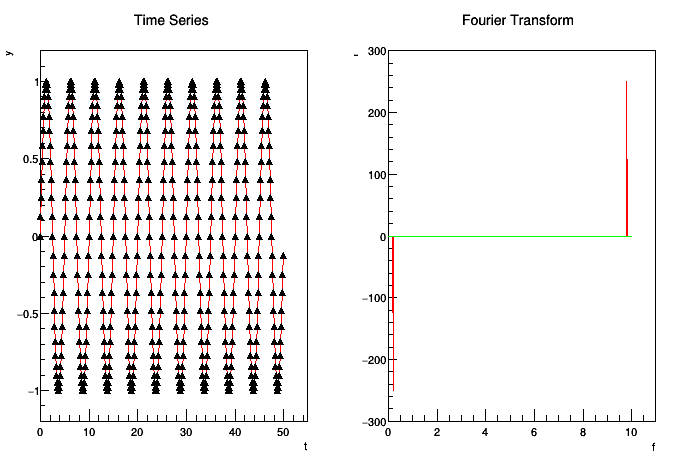

In [7]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle

gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Fourier Transform', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,1)

c1.cd(1)
gr = TGraph(N,t,y)
gr.SetMarkerStyle(22)
gr.SetLineColor(2)
gr.SetTitle("Time Series")
gr.GetXaxis().SetTitle("t")
gr.GetYaxis().SetTitle("y")
gr.Draw("APL")

c1.cd(2)
grr = TGraph(N,f,ytReal)
gri = TGraph(N,f,ytImag)
gri.SetMarkerStyle(22)
grr.SetMarkerStyle(23)
gri.SetLineColor(2)
grr.SetLineColor(3)
gri.SetTitle("Fourier Transform")
gri.GetXaxis().SetTitle("f")
gri.GetYaxis().SetTitle("Y")
gri.Draw("AL")
grr.Draw("L")
c1.Draw()